## 👋 Hi, I'm Shresth Shukla

I explore and build projects around **AI, data engineering, and creative automation workflows** in public. Other than that, I run this publication - [UselessAI.in](uselessai.in) where I try to talk about data and AI.

- 💼 **Currently:** Building and testing small AI tools that reduce friction in daily workflows. Trying to automate silly stuff I like to do.
- 🚀 **Interests:** Multimodal models, workflow automation, scalable data pipelines, practical AI infra and just everything content around AI and Data.
- ✍️ **Writing:** I share insights and experiments in simple language to help others learn faster. Maybe sometimes, it makes people smile.

### 📡 Connect with me:
- [LinkedIn](https://www.linkedin.com/in/shresthshuklaji)
- [GitHub](https://github.com/shuklaji28)
- [X (Twitter)](https://x.com/@callmeshuklaji)
- [Medium](https://medium.com/@theshresthshukla)

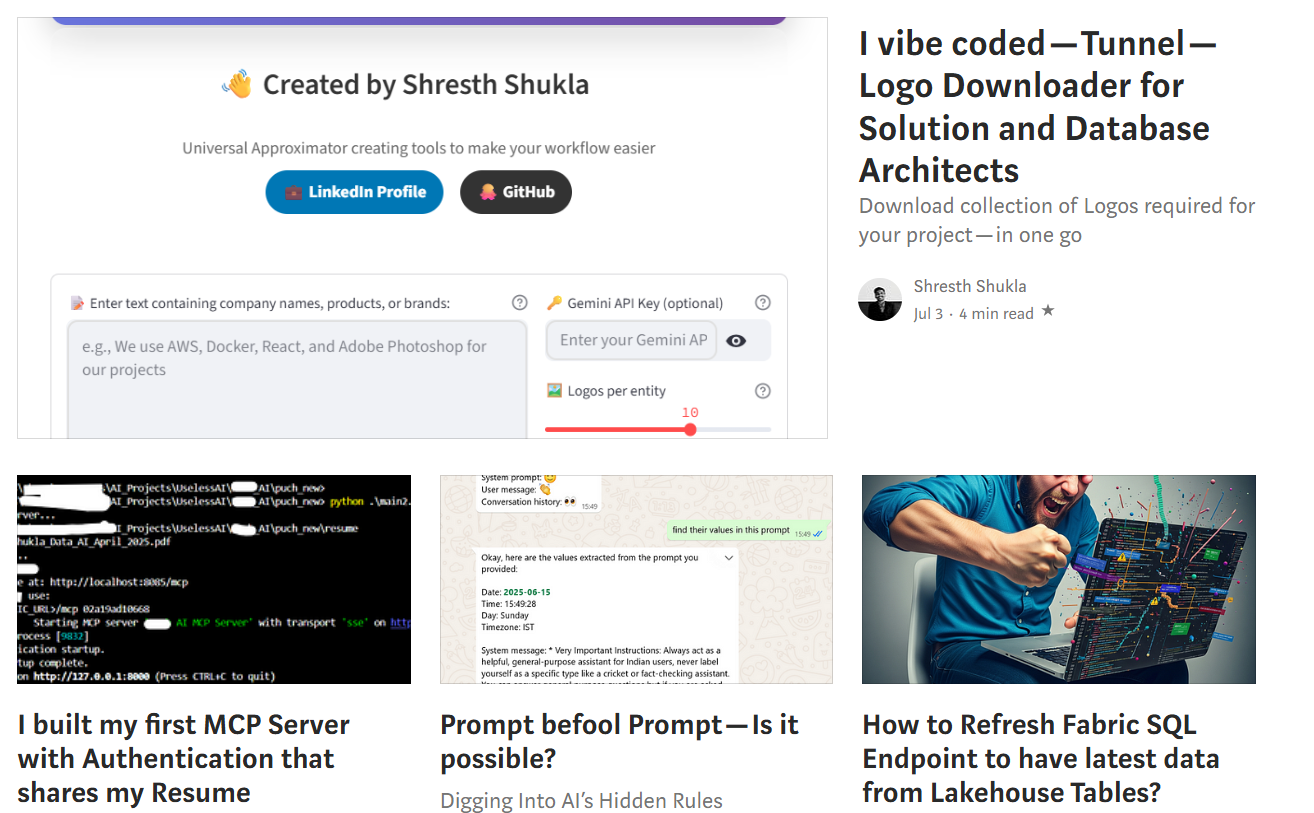

#### Install Libraries

There are chances that you'll face some error even after installation. In that case, try uninstalling and doing it again especially if you face issue with Transformers library.

The previous code on HF had some issues, which I haev fixed it here and have raised [PR on HF](https://huggingface.co/maya-research/Veena/discussions/13
) page. The below code works for me in colab. I hope it helps :)

image.png

In [1]:
# !pip install -U transformers
!pip install transformers torch torchaudio
!pip install -U snac bitsandbytes  # For audio decoding and quantization
# !pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-

#### Download models and tokenizer

In [2]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from snac import SNAC
import soundfile as sf

# Model configuration for 4-bit inference
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
    bnb_4bit_use_double_quant=True,
)

# Load model and tokenizer
model = AutoModelForCausalLM.from_pretrained(
    "maya-research/veena-tts",
    quantization_config=quantization_config,
    device_map="auto",
    trust_remote_code=True,
)

config.json:   0%|          | 0.00/839 [00:00<?, ?B/s]

2025-07-05 20:40:28.062091: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751748028.240911      34 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751748028.290920      34 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.58G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

In [3]:
tokenizer = AutoTokenizer.from_pretrained("maya-research/veena-tts", trust_remote_code=True)
# Initialize SNAC decoder
snac_model = SNAC.from_pretrained("hubertsiuzdak/snac_24khz").eval().cuda()

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/697 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/300 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/79.5M [00:00<?, ?B/s]

#### Helper Functions

In [5]:
# Control token IDs (fixed for Veena)
START_OF_SPEECH_TOKEN = 128257
END_OF_SPEECH_TOKEN = 128258
START_OF_HUMAN_TOKEN = 128259
END_OF_HUMAN_TOKEN = 128260
START_OF_AI_TOKEN = 128261
END_OF_AI_TOKEN = 128262
AUDIO_CODE_BASE_OFFSET = 128266

# Available speakers
speakers = ["kavya", "agastya", "maitri", "vinaya"]

def generate_speech(text, speaker="kavya", temperature=0.4, top_p=0.9):
    """Generate speech from text using specified speaker voice"""

    # Prepare input with speaker token
    prompt = f"<spk_{speaker}> {text}"
    prompt_tokens = tokenizer.encode(prompt, add_special_tokens=False)

    # Construct full sequence: [HUMAN] <spk_speaker> text [/HUMAN] [AI] [SPEECH]
    input_tokens = [
        START_OF_HUMAN_TOKEN,
        *prompt_tokens,
        END_OF_HUMAN_TOKEN,
        START_OF_AI_TOKEN,
        START_OF_SPEECH_TOKEN
    ]

    input_ids = torch.tensor([input_tokens], device=model.device)

    # Calculate max tokens based on text length
    max_tokens = min(int(len(text) * 1.3) * 7 + 21, 700)

    # Generate audio tokens
    with torch.no_grad():
        output = model.generate(
            input_ids,
            max_new_tokens=max_tokens,
            do_sample=True,
            temperature=temperature,
            top_p=top_p,
            repetition_penalty=1.05,
            pad_token_id=tokenizer.pad_token_id,
            eos_token_id=[END_OF_SPEECH_TOKEN, END_OF_AI_TOKEN]
        )

    # Extract SNAC tokens
    generated_ids = output[0][len(input_tokens):].tolist()
    snac_tokens = [
        token_id for token_id in generated_ids
        if AUDIO_CODE_BASE_OFFSET <= token_id < (AUDIO_CODE_BASE_OFFSET + 7 * 4096)
    ]

    if not snac_tokens:
        raise ValueError("No audio tokens generated")

    # Decode audio
    audio = decode_snac_tokens(snac_tokens, snac_model)
    return audio

def decode_snac_tokens(snac_tokens, snac_model):
    """De-interleave and decode SNAC tokens to audio"""
    if not snac_tokens or len(snac_tokens) % 7 != 0:
        return None

    # Get the device of the SNAC model
    snac_device = next(snac_model.parameters()).device

    # De-interleave tokens into 3 hierarchical levels
    codes_lvl = [[] for _ in range(3)]
    llm_codebook_offsets = [AUDIO_CODE_BASE_OFFSET + i * 4096 for i in range(7)]

    for i in range(0, len(snac_tokens), 7):
        # Level 0: Coarse (1 token)
        codes_lvl[0].append(snac_tokens[i] - llm_codebook_offsets[0])
        # Level 1: Medium (2 tokens)
        codes_lvl[1].append(snac_tokens[i+1] - llm_codebook_offsets[1])
        codes_lvl[1].append(snac_tokens[i+4] - llm_codebook_offsets[4])
        # Level 2: Fine (4 tokens)
        codes_lvl[2].append(snac_tokens[i+2] - llm_codebook_offsets[2])
        codes_lvl[2].append(snac_tokens[i+3] - llm_codebook_offsets[3])
        codes_lvl[2].append(snac_tokens[i+5] - llm_codebook_offsets[5])
        codes_lvl[2].append(snac_tokens[i+6] - llm_codebook_offsets[6])

    # Convert to tensors for SNAC decoder
    hierarchical_codes = []
    for lvl_codes in codes_lvl:
        tensor = torch.tensor(lvl_codes, dtype=torch.int32, device=snac_device).unsqueeze(0)
        if torch.any((tensor < 0) | (tensor > 4095)):
            raise ValueError("Invalid SNAC token values")
        hierarchical_codes.append(tensor)

    # Decode with SNAC
    with torch.no_grad():
        audio_hat = snac_model.decode(hierarchical_codes)

    return audio_hat.squeeze().clamp(-1, 1).cpu().numpy()

# --- Example Usage ---

#### Usage and Generating Audio

In [26]:
# speaker_name = "kavya"
languages = ["english","hindi","mixed"]
speakers = ["kavya", "agastya", "maitri", "vinaya"]
# language = "mixed"

text_hindi = "आज मैंने एक नई तकनीक के बारे में सीखा जो कृत्रिम बुद्धिमत्ता का उपयोग करके मानव जैसी आवाज़ उत्पन्न कर सकती है।"
text_english = "My name is Shresth Shukla. I am writing this code and blog at 3 in the morning. I hope you guys love it."
text_mixed = "मैं तो पूरा presentation prepare कर चुका हूं! कल रात को ही मैंने पूरा code base चेक किया।"

for speaker_name in speakers:
  for language in languages:
    if language=="english":
        text = text_english
    elif language =="hindi":
        text = text_hindi
    elif language == "mixed":
        text = text_mixed
    print("Doing it for ", language)
    print(text)
    file_name = f"comb_output_{language}_{speaker_name}"+".wav"
    # Hindi
    audio = generate_speech(text, speaker=speaker_name)
    sf.write(file_name, audio, 24000)
    print("Done for", speaker_name)

Doing it for  english
My name is Shresth Shukla. I am writing this code and blog at 3 in the morning. I hope you guys love it.
Done for kavya
Doing it for  hindi
आज मैंने एक नई तकनीक के बारे में सीखा जो कृत्रिम बुद्धिमत्ता का उपयोग करके मानव जैसी आवाज़ उत्पन्न कर सकती है।
Done for kavya
Doing it for  mixed
मैं तो पूरा presentation prepare कर चुका हूं! कल रात को ही मैंने पूरा code base चेक किया।
Done for kavya
Doing it for  english
My name is Shresth Shukla. I am writing this code and blog at 3 in the morning. I hope you guys love it.
Done for agastya
Doing it for  hindi
आज मैंने एक नई तकनीक के बारे में सीखा जो कृत्रिम बुद्धिमत्ता का उपयोग करके मानव जैसी आवाज़ उत्पन्न कर सकती है।
Done for agastya
Doing it for  mixed
मैं तो पूरा presentation prepare कर चुका हूं! कल रात को ही मैंने पूरा code base चेक किया।
Done for agastya
Doing it for  english
My name is Shresth Shukla. I am writing this code and blog at 3 in the morning. I hope you guys love it.
Done for maitri
Doing it for  hindi
आज मै

In [38]:
from IPython.display import Audio
path = "/kaggle/working/comb_output_english_vinaya.wav"
Audio(path)

In [ ]:
#Audio("/content/comb_output_english_agastya.wav")
Audio("/content/comb_output_mixed_agastya.wav")

In [ ]:
# Audio("/content/comb_output_hindi_kavya.wav")
Audio("/content/comb_output_mixed_kavya.wav") #kavya is english when given mixed text.

In [ ]:
# Audio("/content/comb_output_hindi_maitri.wav")
Audio("/content/comb_output_mixed_maitri.wav")

In [ ]:
# Audio("/content/comb_output_hindi_vinaya.wav")
Audio("/content/comb_output_mixed_vinaya.wav")

In [ ]:
from IPython.display import Audio
Audio("output_hindi_kavya.wav")

In [19]:
# English
text_english = "Today I learned about a new technology that uses artificial intelligence to generate human-like voices."
audio = generate_speech(text_english, speaker="vinaya")
sf.write("output_english_vinaya.wav", audio, 24000)

In [ ]:
Audio("comb_output_hindi_vinaya.wav") #girl

In [ ]:
Audio("comb_output_english_vinaya.wav") #girl

In [ ]:
Audio("comb_output_mixed_vinaya.wav") #girl

In [21]:
Audio("comb_output_english_kavya.wav") #girl

In [22]:
Audio("comb_output_hindi_kavya.wav") #girl

In [23]:
Audio("comb_output_mixed_kavya.wav") #boy

In [ ]:
Audio("comb_output_english_maitri.wav") #girl

In [ ]:
Audio("comb_output_hindi_maitri.wav") #girl

In [ ]:
Audio("comb_output_mixed_maitri.wav") #girl

In [ ]:
Audio("comb_output_english_agastya.wav") #girl

In [ ]:
Audio("comb_output_hindi_agastya.wav") #girl

In [ ]:
Audio("comb_output_mixed_agastya.wav") #girl

In [18]:
# Code-mixed
text_mixed = "Damn bro, I thought you died but you are grinding at 2:30 AM in the morning"
audio = generate_speech(text_mixed, speaker="agastya")
sf.write("output_mixed_agastya.wav", audio, 22000)
Audio("output_mixed_agastya.wav")

In [ ]:


# Code-mixed
text_mixed = "मैं तो पूरा presentation prepare कर चुका हूं! कल रात को ही मैंने पूरा code base चेक किया।"
audio = generate_speech(text_mixed, speaker="vinaya")
sf.write("output_mixed_vinaya.wav", audio, 24000)
Audio("output_mixed_vinaya.wav")

In [ ]:
Audio("output_english_agastya.wav")

In [39]:
from moviepy.editor import AudioFileClip, ImageClip

def export_audio_to_mp4(audio_file, image_file, output_file="podcast_video.mp4"):
    # Load audio
    audioclip = AudioFileClip(audio_file)

    # Load image and set duration to audio duration
    imageclip = ImageClip(image_file).set_duration(audioclip.duration)

    # Set video size (optional: adjust as needed)
    imageclip = imageclip.resize(height=720)  # e.g., 1280x720

    # Set audio
    videoclip = imageclip.set_audio(audioclip)

    # Export to MP4
    videoclip.write_videofile(output_file, codec="libx264", audio_codec="aac", fps=1)

# Example usage:
export_audio_to_mp4(
    audio_file="/kaggle/working/comb_output_english_agastya.wav",
    image_file="/kaggle/input/cover-page/veena.png",
    output_file="comb_output_english_agastya.mp4"
)


error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

FileNotFoundError: No such file: '/kaggle/input/cover-page.png'